In [1]:
import seaborn as sns
#from math import sqrt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#import tensorflow as tf
#from sklearn.metrics import mean_squared_error
import datetime
import time

In [12]:
start_date = '2017-01-01'
end_date = datetime.date.today()
symbol = [ "^GSPC", "^DJI", "^IXIC", "^RUT", "PL=F",
    "EURUSD=X", "JPY=X", "CAD=X", "UUP",
    "^TNX", "^IRX", "TLT",
    "CL=F", "GC=F", "BZ=F",
    "^GDAXI", "^FTSE", "^N225",
    "XRT", "XLK", "XLF", "SI=F", "AUDUSD=X", "^N100", 
    "^IBEX", "^FCHI", "^HSI", "^TWII", "BTC-USD"
]
data_history = yf.download(symbol, start=start_date, end=end_date)['Close']#.dropna()

[*********************100%***********************]  29 of 29 completed


In [13]:
print(data_history.isnull().sum())

Ticker
AUDUSD=X     869
BTC-USD        0
BZ=F         942
CAD=X        869
CL=F         943
EURUSD=X     869
GC=F         944
JPY=X        869
PL=F         944
SI=F         944
TLT          944
UUP          944
XLF          944
XLK          944
XRT          944
^DJI         944
^FCHI        905
^FTSE        934
^GDAXI       924
^GSPC        944
^HSI         989
^IBEX        908
^IRX         944
^IXIC        944
^N100        905
^N225       1003
^RUT         944
^TNX         944
^TWII       1019
dtype: int64


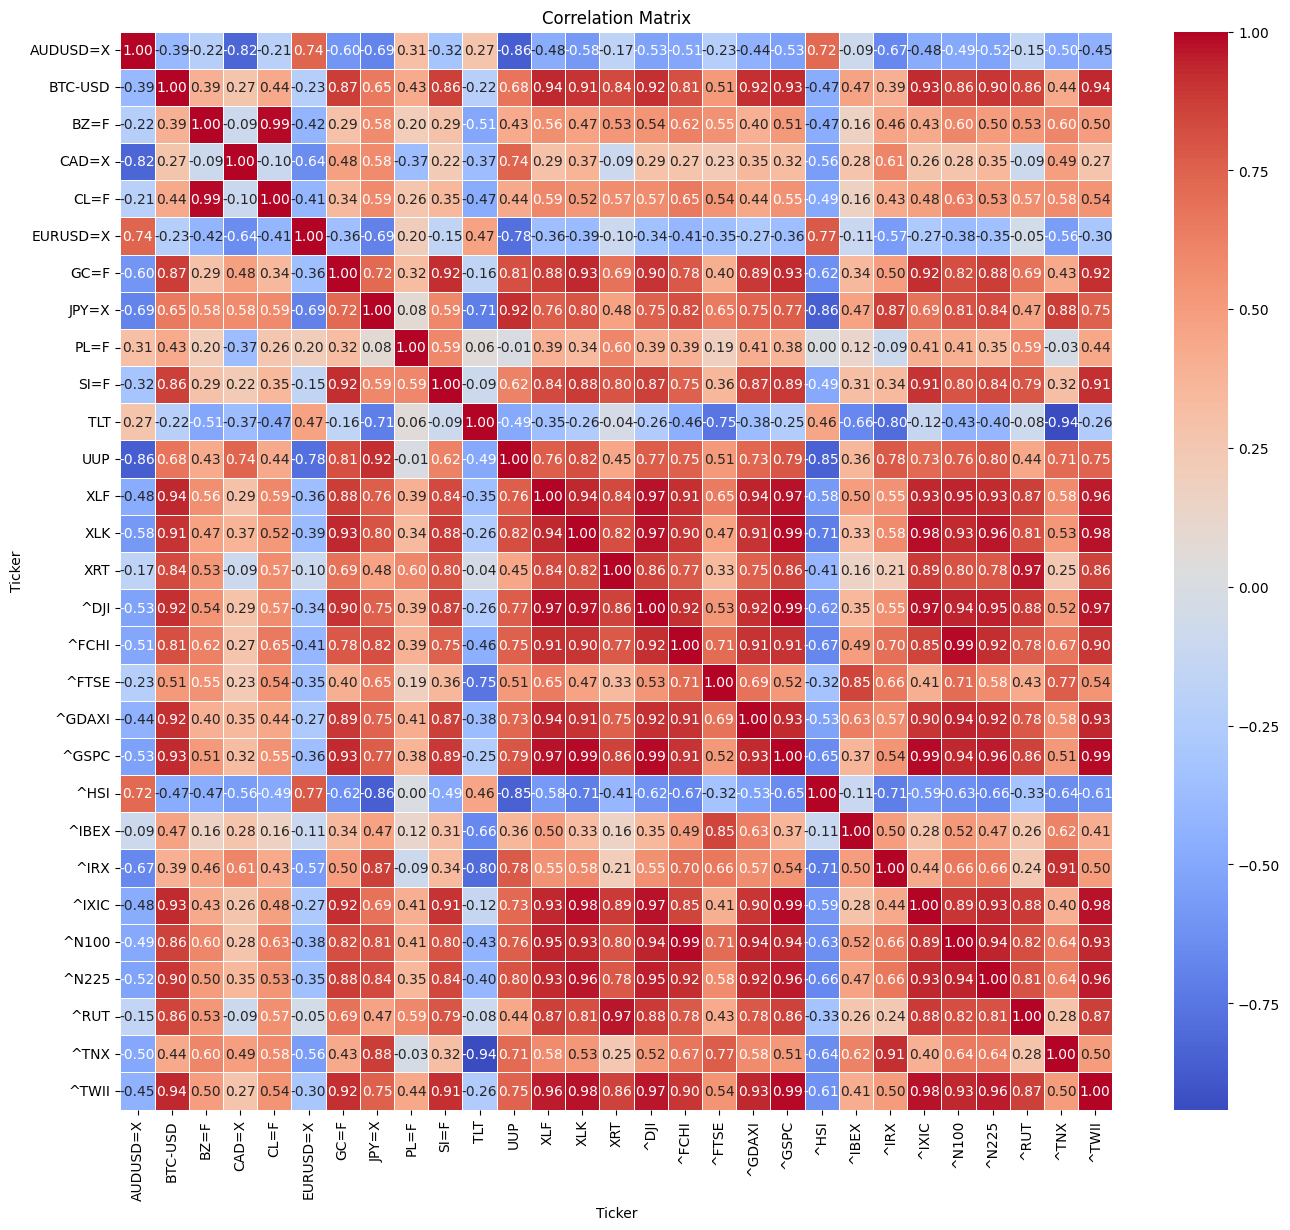

In [11]:
correlation_matrix = data_history.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()